In [19]:
import numpy as np
import matplotlib as plt
import pandas as pd
import re

# Natural Language Tool Kit 
import nltk
#nltk.download('stopwords')
 
# Removing stopword 
from nltk.corpus import stopwords 
  
# Stemming   
from nltk.stem.porter import PorterStemmer


In [20]:
train = pd.read_csv('C://Users//acer//Downloads//DataAnalystTestData.csv')

DATASET = train //Details

In [21]:
train.head()

,Review,date,Author,Location
0,Go left and avoid the crowd / Surf sleep drink...,2019/04/16,674darrylt,"Southport, Australia"
1,There is a decent section of beach but the bui...,2019/04/16,MasafiOne,"Al Ain, United Arab Emirates"
2,The beach is clean and being close to the reef...,2019/04/16,RHM63,"Oxfordshire, United Kingdom"
3,A nice clean beach with a few restaurants all ...,2019/04/16,carterkenny,"Phuket, Thailand"
4,the beach is beautiful. great surfing spot. bu...,2019/04/16,ThomasArabia,"Abu Dhabi, United Arab Emirates"


.

.

Information about the dataset train  

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5618 entries, 0 to 5617
Data columns (total 4 columns):
Review      5618 non-null object
date        5618 non-null object
Author      5618 non-null object
Location    4606 non-null object
dtypes: object(4)
memory usage: 175.6+ KB


In [22]:
print("Number of Locations not mentioned:",sum(train.Location.isnull()))
print("Percentage of above:",100*sum(train.Location.isnull())/5618)

Number of Locations not mentioned: 1012
Percentage of above: 18.013527945888217


                INSIGHT-i.) Number of Locations that are not mentioned = 1012 => 18%






.


Describing the dataset :-
 The dataset is a set of reviews about the visit to SriLAnka by different people from different locations on different dates.
The dataset has 5618 entries with fields - Review, date, Author and Location .

In [64]:
train.describe()

,Review,date,Author,Location
count,5618,5618,5618,4606
unique,5607,344,3973,1328
top,The fort and its colonial interior are somethi...,2019/04/16,Umang A,"London, United Kingdom"
freq,2,150,12,251


In [27]:
dte = train.groupby('date').nunique()
print(dte)
print (dte.sort_values('Review',ascending=False).head())
print ("\n",dte.sort_values('Author',ascending=False).head())

            Review  date  Author  Location
date                                      
2018/05/02       9     1       8         7
2018/05/03      10     1       8         6
2018/05/04      11     1       7         5
2018/05/05      14     1      11         6
2018/05/06       4     1       4         3
2018/05/07      11     1      10         8
2018/05/08      12     1      10         9
2018/05/09       4     1       4         2
2018/05/10      11     1       8         5
2018/05/11       5     1       5         4
2018/05/12      13     1      10         6
2018/05/13      15     1       9         8
2018/05/14       9     1       6         4
2018/05/15      21     1      16        10
2018/05/16       4     1       4         3
2018/05/17       8     1       8         7
2018/05/18       9     1       6         2
2018/05/19       5     1       5         3
2018/05/20       9     1       8         4
2018/05/21       9     1       9         6
2018/05/22      10     1       9         7
2018/05/23 

In [71]:
dte['Review'].max()

150

In [84]:
train[(train['date']=='2019/04/16') ].describe()

,Review,date,Author,Location
count,150,150,150,130
unique,150,1,118,76
top,Amazing feeling so much to see and learn.. fee...,2019/04/16,K8errm24,"Dubai, United Arab Emirates"
freq,1,150,5,10


                    INSIGHT ii.) The maximum number of reviews were on the date 2019/04/16 . 118 tourists from 76 Locations(excluding 20 non mentioned Locations) wrote 150 reviews . Among them, majority was from Dubai,UAE .

.

In [28]:
dte1 = train.groupby('Author').nunique()

print (dte1)
print(dte1.sort_values('Review',ascending = False))



                      Review  date  Author  Location
Author                                              
-Guzzis-are-ace-           3     2       1         1
01tw1969                   2     1       1         1
0428Luna                   1     1       1         1
09umang                    1     1       1         1
1000Rainer                 1     1       1         1
100russellt                1     1       1         1
101cheriet                 1     1       1         1
106christie                3     2       1         1
111aleksandran             1     1       1         1
113jennin                  1     1       1         0
117LauG                    1     1       1         1
119claire                  2     1       1         1
1206Juni                   1     1       1         1
121Ralph121                1     1       1         1
123lakshmanana             1     1       1         1
123tonim                   2     1       1         1
1266ali                    1     1       1    

In [29]:
dte11=dte1[(dte1['Review']>1) & (dte1['date']>1)]
print(dte11.head(10))
print(dte11.shape)

                  Review  date  Author  Location
Author                                          
-Guzzis-are-ace-       3     2       1         1
106christie            3     2       1         1
150dwaynem             3     2       1         1
211priyankap           2     2       1         1
21rebekar              2     2       1         1
264sallyh              3     2       1         1
301lisa33              4     3       1         1
307cliver              7     6       1         1
318zarai               2     2       1         1
376rakeshm             2     2       1         1
(563, 4)


In [30]:
print('% of people revisited more than once:',100*dte11.shape[0]/train['Author'].nunique())

% of people revisited more than once: 14.170651900327208


In [31]:
train1=train.copy()
train1[train1['Author']=='Umang A']

,Review,date,Author,Location
2867,One of the most beautiful reserves in Sri Lank...,2018/11/20,Umang A,"Mumbai, India"
2870,The old town of Galle is protatcted by the wal...,2018/11/20,Umang A,"Mumbai, India"
2872,Galle fort or the old town is probably the bes...,2018/11/20,Umang A,"Mumbai, India"
3248,This national park is famoua for world's end p...,2018/10/25,Umang A,"Mumbai, India"
3660,Sri Lanka is also famous for wild life and maj...,2018/09/26,Umang A,"Mumbai, India"
3682,One of the most famous Budha temple in Sri Lan...,2018/09/25,Umang A,"Mumbai, India"
3695,As I said this is d most famous tourist attrac...,2018/09/23,Umang A,"Mumbai, India"
3696,The most famous attraction of Sri Lanka... A 2...,2018/09/23,Umang A,"Mumbai, India"
3702,Probably this is the best place to have a grea...,2018/09/23,Umang A,"Mumbai, India"
4102,This beach is located a bit outside colombo bu...,2018/08/27,Umang A,"Mumbai, India"


                    INSIGHT iii.) Umang A from Mumbai,India has reviewed the most number of times. He has reviewed in 8th,9th,10th and 11th month of 2018 and he has really enjoyed the tour.

.

.

In [32]:
dte2 = train.groupby('Location').nunique()

print (dte2.sort_values('Review',ascending=False).head())

                        Review  date  Author  Location
Location                                              
London, United Kingdom     250   151     168         1
Colombo, Sri Lanka         198   120     145         1
Melbourne, Australia       126   101      94         1
Sydney, Australia          114    77      70         1
Mumbai, India               89    65      57         1


In [33]:
train[train['Location'] == 'London, United Kingdom'].groupby('date').nunique().sort_values('Author',ascending=False).head(50)

,Review,date,Author,Location
date,,,,
2019/04/16,7,1,6,1
2019/03/12,3,1,3,1
2019/02/20,3,1,3,1
2019/02/21,3,1,3,1
2018/08/12,3,1,3,1
2018/10/03,3,1,3,1
2019/01/24,3,1,3,1
2019/03/11,4,1,3,1
2019/03/06,3,1,3,1


                     INSIGHT iv.) The majority of the tourists are from London,United Kingdom and among them most of the travellers prefer to travel during October - April period.

.

.

.......

.......

#To find the percentage of positive,negative and neutral reviews using NLTK

In [34]:
import nltk
#nltk.download()
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SIA()

In [35]:
train1.head()

,Review,date,Author,Location
0,Go left and avoid the crowd / Surf sleep drink...,2019/04/16,674darrylt,"Southport, Australia"
1,There is a decent section of beach but the bui...,2019/04/16,MasafiOne,"Al Ain, United Arab Emirates"
2,The beach is clean and being close to the reef...,2019/04/16,RHM63,"Oxfordshire, United Kingdom"
3,A nice clean beach with a few restaurants all ...,2019/04/16,carterkenny,"Phuket, Thailand"
4,the beach is beautiful. great surfing spot. bu...,2019/04/16,ThomasArabia,"Abu Dhabi, United Arab Emirates"


In [36]:
train1['neg']=train1['Review'].apply(lambda x:sid.polarity_scores(x)['neg'])
train1['pos']=train1['Review'].apply(lambda x:sid.polarity_scores(x)['pos'])
train1['neu']=train1['Review'].apply(lambda x:sid.polarity_scores(x)['neu'])
train1['compound']=train1['Review'].apply(lambda x:sid.polarity_scores(x)['compound'])

In [37]:
pos_review= [j for i,j in enumerate(train1['Review']) if train1['compound'][i] > 0.25 ]
neu_review= [j for i,j in enumerate(train1['Review']) if 0.25>= train1['compound'][i] >= -0.25 ]
neg_review= [j for i,j in enumerate(train1['Review']) if train1['compound'][i] < -0.25 ]

In [38]:
print('positive review -  ',100*len(pos_review)/len(train1['Review']),'%') #+100*len(neg_review)/len(train['Review']) + 100*len(neu_review)/len(train['Review'])
print('negative review -  ',100*len(neg_review)/len(train1['Review']),'%')
print('neutral review -  ',100*len(neu_review)/len(train1['Review']),'%')

positive review -   87.43325026699893 %
negative review -   5.411178355286578 %
neutral review -   7.155571377714489 %


                    INSIGHT v.)From the reviews we can conclude that 
1) 87.4% of the reviewers are giving positive feedback , 5.4% of them are fiving negative reviews and rest is having a neutral opinion( with a threshold of compound score = 0.25).


.

.

In [40]:
train1.head(20)

,Review,date,Author,Location,neg,pos,neu,compound
0,Go left and avoid the crowd / Surf sleep drink...,2019/04/16,674darrylt,"Southport, Australia",0.115,0.000,0.885,-0.2960
1,There is a decent section of beach but the bui...,2019/04/16,MasafiOne,"Al Ain, United Arab Emirates",0.195,0.065,0.740,-0.7837
2,The beach is clean and being close to the reef...,2019/04/16,RHM63,"Oxfordshire, United Kingdom",0.000,0.217,0.783,0.7269
3,A nice clean beach with a few restaurants all ...,2019/04/16,carterkenny,"Phuket, Thailand",0.000,0.375,0.625,0.9001
4,the beach is beautiful. great surfing spot. bu...,2019/04/16,ThomasArabia,"Abu Dhabi, United Arab Emirates",0.085,0.275,0.640,0.7587
5,My advice... do it in the morning before it ge...,2019/04/16,MelbourneSeeTheWorld,"Galle, Sri Lanka",0.027,0.168,0.805,0.9656
6,We were very excited to visit .. and more exci...,2019/04/16,Malini P,"Bangalore District, India",0.060,0.194,0.745,0.9823
7,The ancient city was one of our favorite stops...,2019/04/16,K8errm24,"Dubai, United Arab Emirates",0.034,0.237,0.729,0.7003
8,What an experience it is to climb the rock. Ou...,2019/04/16,SteveUz,"London, United Kingdom",0.017,0.027,0.956,0.2598
9,This area is fascinating. The museum gives a g...,2019/04/16,Davbesfoodie,"Bairnsdale, Australia",0.000,0.192,0.808,0.9516


.

.

.

In [41]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#from datetime import datetime as dt
#from dateutil.parser import parse

In [42]:
corpus = []
for i in range(0, 5618):
    review = re.sub('[^a-zA-Z]', ' ', train['Review'][i])  
      
    # convert all cases to lower cases 
    review = review.lower()  
      
    # split to array(default delimiter is " ") 
    review = review.split()  
      
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer()  
      
    # loop for stemming each word 
    # in string array at ith row     
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
                  
    # rejoin all string array elements 
    # to create back into a string 
    review = ' '.join(review)   
      
    # append each string to create 
    # array of clean text  
    corpus.append(review)

How many most common words to print: 50

OK. The 50 most common words are as follows

visit :  2259
place :  2165
templ :  1934
view :  1887
see :  1828
walk :  1786
climb :  1496
top :  1493
beach :  1476
get :  1418
go :  1333
time :  1297
one :  1271
rock :  1240
sri :  1233
worth :  1194
take :  1178
around :  1147
beauti :  1135
lot :  1106
good :  1006
well :  995
great :  978
lanka :  976
guid :  963
nice :  950
day :  944
peopl :  911
also :  885
mani :  846
us :  796
way :  783
would :  766
water :  752
amaz :  744
hour :  731
crowd :  715
park :  707
must :  705
realli :  700
even :  686
love :  682
much :  670
like :  664
histori :  652
earli :  651
enjoy :  648
tourist :  642
fort :  632
make :  618


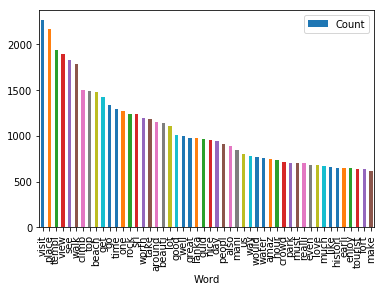

In [44]:
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for a in corpus:
 for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    #if word not in stopwords:
    if word not in wordcount:
            wordcount[word] = 1
    else:
            wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
#file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

                Insight vi.)Most of the reviews were about temple and beaches.

.

.

#For finding words occurances and polarity using TEXTBLOB

In [50]:
#word frequency using Textblob
from wordcloud import WordCloud
from textblob import TextBlob  
import matplotlib.pyplot as plt

In [60]:
train2=train.copy()
polarity=[] # list which will contain the polarity of the comments 
subjectivity=[] # list which will contain the subjectivity of the comments


In [61]:
for i in train2['Review'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)

In [62]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (10,10))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(data)) 
    plt.imshow(wc)
    plt.axis('off')         

In [63]:
train2['polarity']=polarity
train2['subjectivity']=subjectivity 

In [64]:
df_negative=train2[['Review','polarity','subjectivity']][train2.polarity<0]
df_positive=train2[['Review','polarity','subjectivity']][train2.polarity>0]           
df_neutral=train2[['Review','polarity','subjectivity']][train2.polarity==0]   

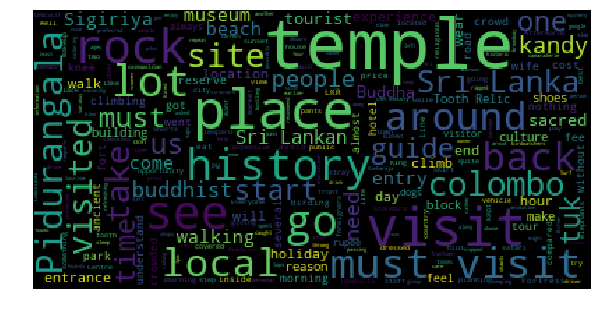

In [65]:
wc(train1['Review'][train2.polarity==0],'black','Common Words' )

In [66]:
train2.head(20)

,Review,date,Author,Location,polarity,subjectivity
0,Go left and avoid the crowd / Surf sleep drink...,2019/04/16,674darrylt,"Southport, Australia",0.000000,0.050000
1,There is a decent section of beach but the bui...,2019/04/16,MasafiOne,"Al Ain, United Arab Emirates",0.066190,0.375238
2,The beach is clean and being close to the reef...,2019/04/16,RHM63,"Oxfordshire, United Kingdom",0.633333,0.850000
3,A nice clean beach with a few restaurants all ...,2019/04/16,carterkenny,"Phuket, Thailand",0.236111,0.616667
4,the beach is beautiful. great surfing spot. bu...,2019/04/16,ThomasArabia,"Abu Dhabi, United Arab Emirates",0.408333,0.669444
5,My advice... do it in the morning before it ge...,2019/04/16,MelbourneSeeTheWorld,"Galle, Sri Lanka",0.296120,0.501367
6,We were very excited to visit .. and more exci...,2019/04/16,Malini P,"Bangalore District, India",0.322024,0.593519
7,The ancient city was one of our favorite stops...,2019/04/16,K8errm24,"Dubai, United Arab Emirates",0.441667,0.566667
8,What an experience it is to climb the rock. Ou...,2019/04/16,SteveUz,"London, United Kingdom",0.070278,0.240556
9,This area is fascinating. The museum gives a g...,2019/04/16,Davbesfoodie,"Bairnsdale, Australia",0.380128,0.491026
